Kuramoto-Sivashinsky equation (KSE)
=================

KSE is a representative example of spatio-temporal chaos [1].

$$
\frac{\partial u}{\partial t}
+ u \frac{\partial u}{\partial x}
+ \frac{\partial^2 u}{\partial x^2}
+ \frac{\partial^4 u}{\partial x^4}
= 0
$$

[1]: http://www.springer.com/us/book/9783642696916

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
! cat examples/kse.rs

extern crate eom;
extern crate ndarray;
extern crate ndarray_linalg;

use ndarray::*;
use ndarray_linalg::*;
use eom::*;
use eom::traits::*;

fn main() {
    let n = 128;
    let l = 100.0;
    let dt = 1e-3;
    let interval = 1000;
    let step = 200;

    let eom = pde::KSE::new(n, l);
    let mut pair = pde::Pair::new(n);
    let n_coef = eom.model_size();
    let teo = semi_implicit::DiagRK4::new(eom, dt);
    let mut teo = adaptor::nstep(teo, interval);

    let x: Array1<c64> = c64::new(0.01, 0.0) * random(n_coef);
    let x = adaptor::iterate(&mut teo, x, 100);

    let ts = adaptor::time_series(x, &mut teo);
    for (t, v) in ts.take(step).enumerate() {
        let time = dt * t as f64;
        print!("{:e},", time);
        let u = pair.to_r(v.as_slice().unwrap());
        let nums: Vec<_> = u.iter().map(|x| format!("{:e}", x)).collect();
        println!("{}", nums.join(","));
    }
}


In [3]:
! cargo run --release --example kse > kse.csv

   Compiling eom v0.9.0 (file:///home/teramura/rhq/github.com/termoshtt/eom)
    Finished release [optimized] target(s) in 2.69 secs
     Running `target/release/examples/kse`


In [4]:
df = pd.read_csv("kse.csv", header=None).set_index(0)

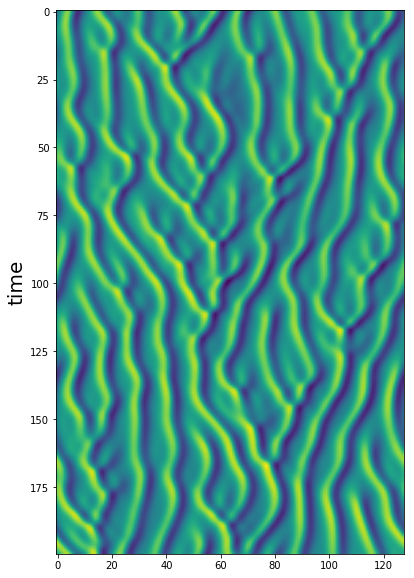

In [5]:
plt.figure(figsize=(10, 10))
plt.imshow(df, interpolation="bilinear")
plt.ylabel("time", fontsize=20)
plt.savefig("kse.png")